In [2]:
!pip  install Selenium

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [6]:
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
#Regression

In [9]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#We are asked to predict 2 labels primary_fuel and capacity_mw.
#From column primary_fuel, we can see that there are categorical data , so it will be termed as classification problem

#From column capacity_mw, there are continuous data, it will be termed as Regression problem.

# Exploratory Data Analysis(EDA)

In [11]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [12]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [ ]:
#25 column names are present in our dataset

In [13]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# from the above cell we can see that there are missing values in many columns.
#Column names that have more than 50% of missing data and we need to delete
-->other_fuel1
-->other_fuel2
-->other_fuel3
-->owner
-->wepp_id
-->generation_gwh_2013
-->generation_gwh_2014
-->generation_gwh_2015
-->generation_gwh_2016
-->generation_gwh_2017
-->generation_data_source
-->estimated_generation_gwh


In [14]:
df.drop(["other_fuel1","other_fuel2","other_fuel3","owner","wepp_id","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_data_source","estimated_generation_gwh"], axis=1, inplace=True)

In [15]:
df.shape

(907, 15)

#our column numbers have been reduced to 13 from initial value of 25

In [16]:
df.nunique().to_frame("Unique Values")

,Unique Values
country,1
country_long,1
name,907
gppd_idnr,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191


By using nunique method, we were able to check unique data information present in our dataset columns

columns "country","country_long","year_of_capacity_data" having 1 unique data filled in all 908 rows and has missing values, so those can be deleted

Names of the columns that we need to remove are as follows:
-->country
-->country_long
-->year_of_capacity_data
-->name
-->gppd_idnr
-->url

In [17]:
df.drop(["country","country_long","year_of_capacity_data","name","gppd_idnr","url"],axis=1, inplace=True)

In [18]:
print(df.shape)

(907, 9)


In [19]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


our new dataset has 908 rows and 7 columns

In [20]:
df.isna().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

we still have missing values in our dataset columns, we will separate our categorical columns and numerical columns so that our model  becomes easier

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   527 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   888 non-null    object 
 7   generation_gwh_2018  448 non-null    float64
 8   generation_gwh_2019  0 non-null      float64
dtypes: float64(6), object(3)
memory usage: 63.9+ KB


we can see there are 7 columns in our filtered dataset and 4 numerical data valued columns and 3 object data valued columns

In [24]:
object_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        object_datatype.append(x)
print(f"Object Data Type Columns are:", object_datatype)

float_datatype=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
        float_datatype.append(x)
print(f"Float Data Type Columns are:", float_datatype)        

Object Data Type Columns are: ['primary_fuel', 'source', 'geolocation_source']
Float Data Type Columns are: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2018', 'generation_gwh_2019']


We have successfully bifurcated the object datatype column names and float data type column names.

we do not have to worry about outliers and skewness in categorical columns 

we can use this separated column names to pre process only on numerical continuous columns

In [25]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(), inplace=True)
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

In [26]:
df.isna().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

In [27]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Reliance Power Ltd                                               4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Jaypee Ltd jccl)                                                 3
Hindustan Zinc ltd                                               3
PEDA                   

From the above cell look at the object data tyepe columns so as to check how many categories each of them hold and how many values/rows are populated

# Visualization 

In [28]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2018', 'generation_gwh_2019'],
      dtype='object')

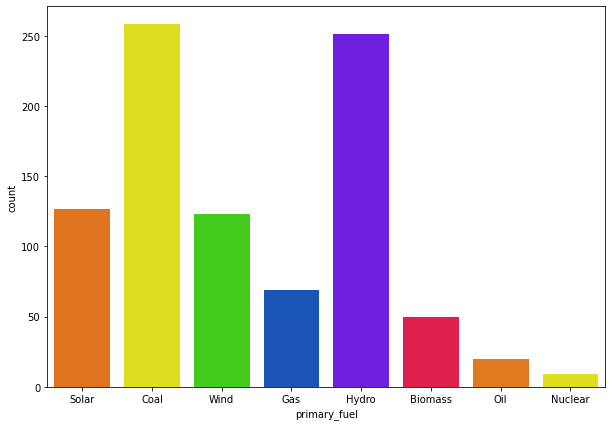

In [29]:
try:
    plt.figure(figsize=(10,7))
    col_name='primary_fuel'
    values=df[col_name].value_counts()
    index=0
    ax=sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2, values[i.get_text()],
               horizontalalignments="center",fontweight='bold',color='w')
        index += 1
        plt.title(f"Count Plot for{col_name}\n")
        plt.ylabel(f"Number of rows")
        plt.show()
except Exception as e:
    pass
        

From the aboce count plot for "primary_fuel" column, we can see that the highest number of values have been covered by coal and hydro fuel types then comes solar and wind.
Finally we see that gas, biomass, oil and nuclear have very low data counts

In [32]:
try:
    plt.figure(gigsize=(10,7))
    col_name='geolocation_source'
    values=df[col_name].value_counrs()
    index=0
    ax=sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index, values[i.get_text()]/2, values[i.get_text()],
               horizaontalalignment="center", fontweight='bold', color='w')
        index += 1
    plt.title(f"Count Plot for {col_name}\n")
    plt.ylabel(f"Number of rows")
    plt.show()
except Exception as e:
    pass

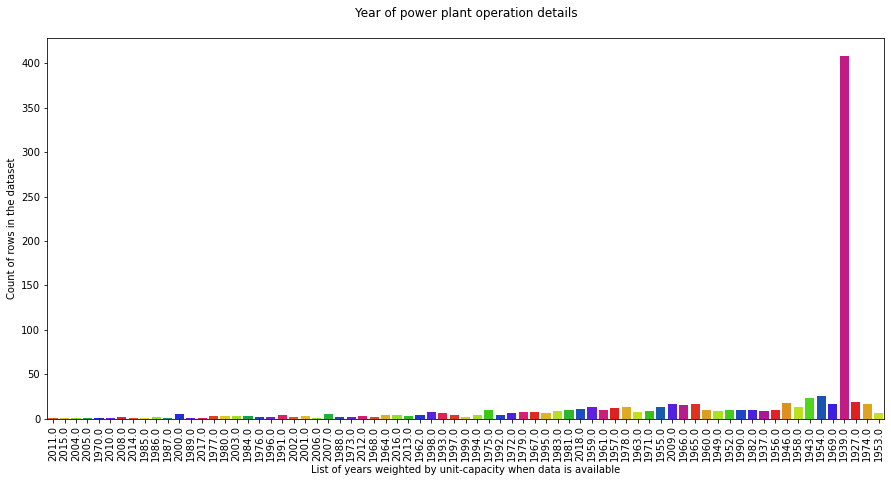

In [33]:
plt.figure(figsize=(15,7))
values=list(df['commissioning_year'].unique())
diag=sns.countplot(df["commissioning_year"],palette="prism")
diag.set_xticklabels(labels=values,rotation=90)
plt.title("Year of power plant operation details\n")
plt.xlabel("List of years weighted by unit-capacity when data is available")
plt.ylabel("Count of rows in the dataset")
plt.show()

From the above count plot we can see the list of years as to when the power plant data was made available.
Since we had missing values in the "commissioning_year" column we replaced it with the mode where in the year 1954 covered the most rows in our dataset compared to all the other years.

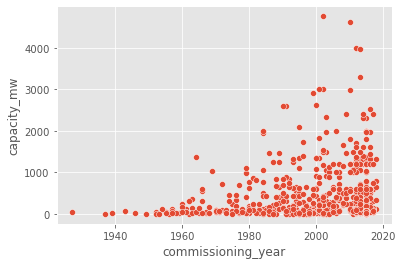

In [34]:
plt.style.use('ggplot')
sns.scatterplot(x="commissioning_year", y="capacity_mw", data=df)
plt.show()

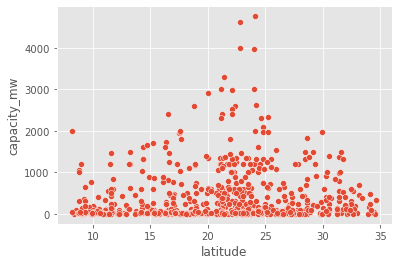

In [35]:
sns.scatterplot(x="latitude",y="capacity_mw", data=df)
plt.show()

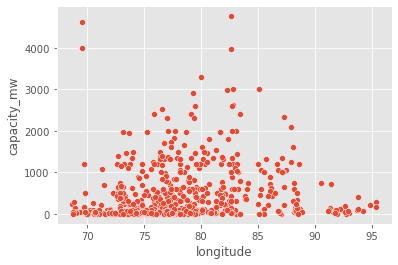

In [36]:
sns.scatterplot(x="longitude",y="capacity_mw",data=df)
plt.show()

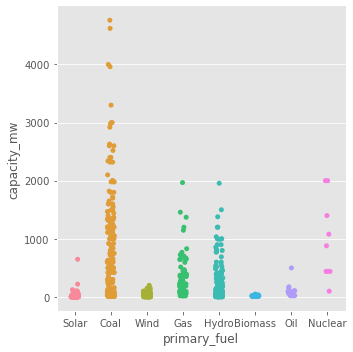

In [37]:
plt.style.use('seaborn-pastel')
sns.catplot(x="primary_fuel", y = "capacity_mw", data=df)
plt.show()

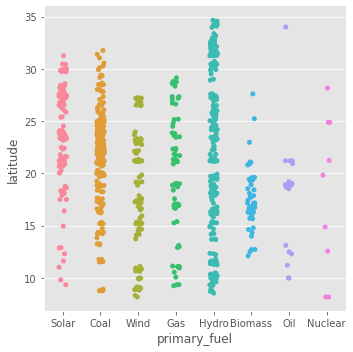

In [38]:
sns.catplot(x="primary_fuel", y="latitude",data=df)
plt.show()

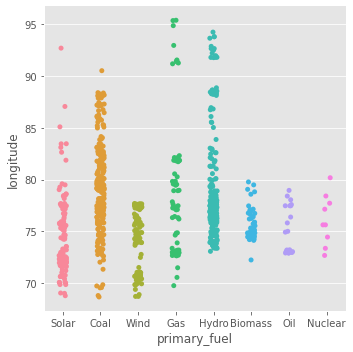

In [39]:
sns.catplot(x="primary_fuel",y="longitude",data=df)
plt.show()

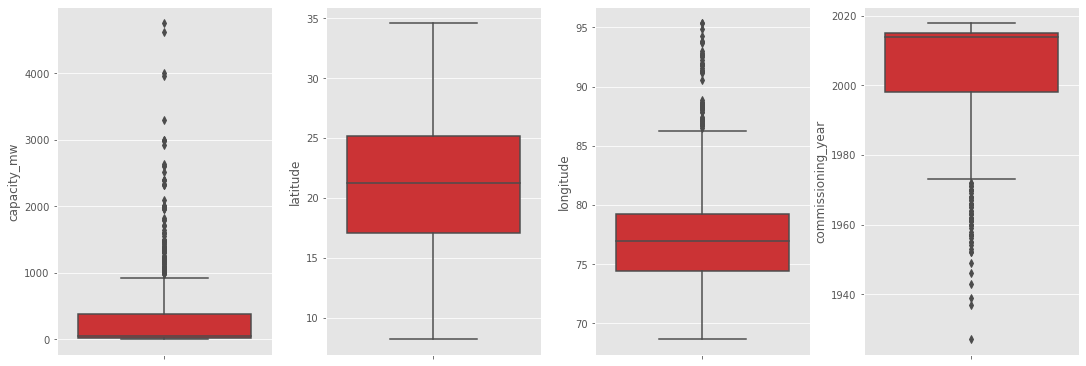

In [40]:
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index=0
ax=ax.flatten()
for col, value in df[float_datatype].items():
    if index<4:
        sns.boxplot(y=col,data=df, ax=ax[index],palette="Set1")
    index += 1
plt.tight_layout(pad=0.4,w_pad=0.4,h_pad=1.0) 
plt.show()

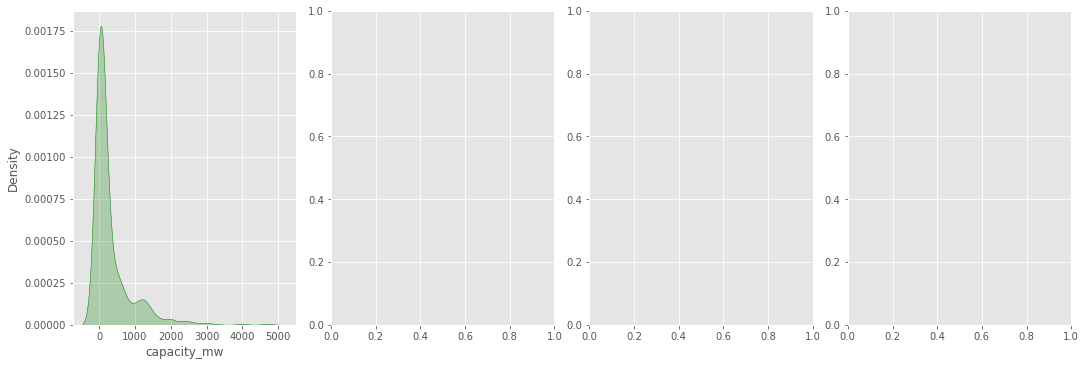

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [42]:
fig, ax=plt.subplots(ncols=4, nrows=1, figsize=(15,5))
index=0
ax=ax.flatten()
for col, value in df[float_datatype].items():
    if index<4:
        sns.distplot(value, ax=ax[index],  hist=False, color="g",kde_kws={"shade": True})
    index += 1
    plt.tight_layout(pad=0.4,w_pad=0.4,h_pad=1.0)
    plt.show()

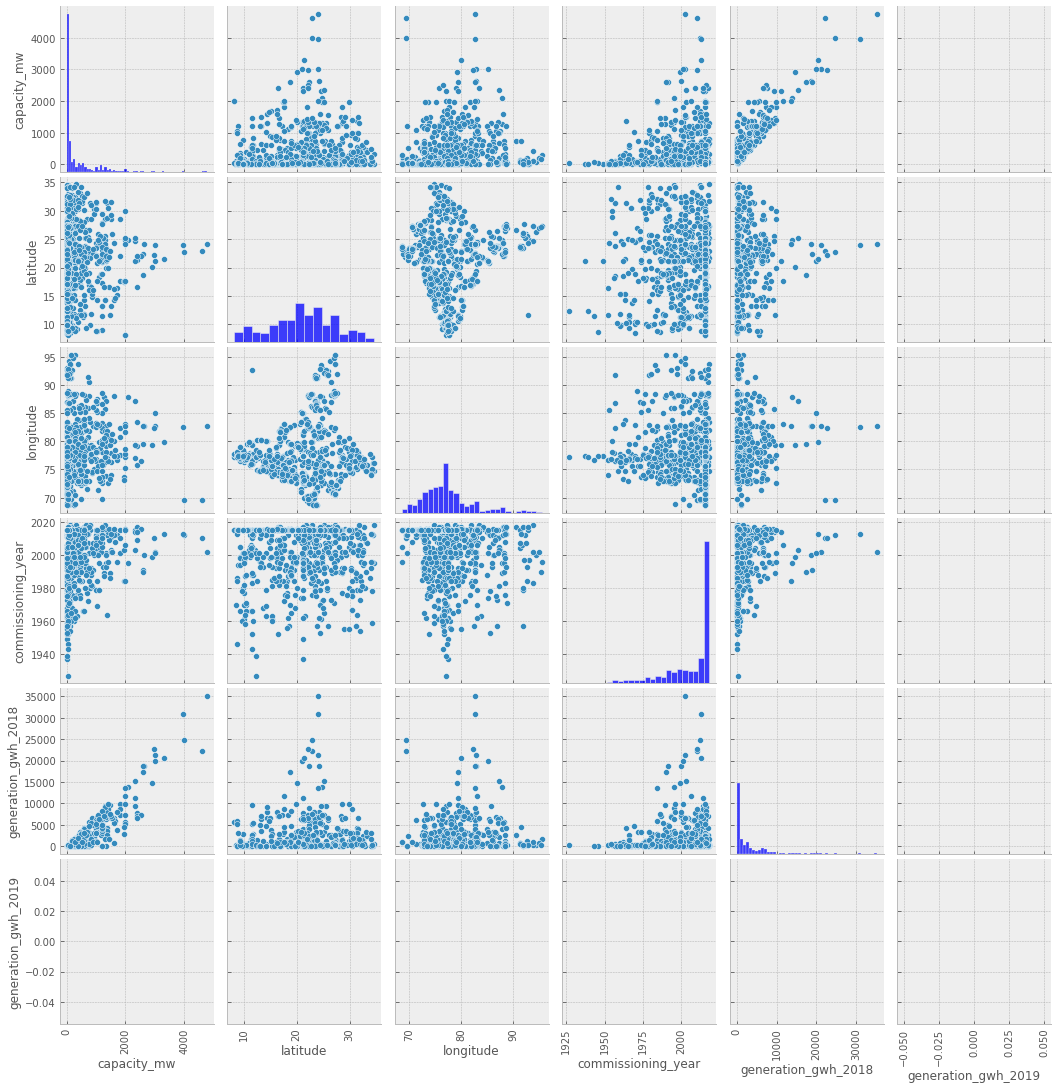

In [43]:
plt.style.use('bmh')
g=sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()    

# Label Encoder

In [44]:
le=LabelEncoder()
df["primary_fuel"]=le.fit_transform(df["primary_fuel"])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,Ultratech Cement ltd,WRI,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,CDM,WRI,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,Central Electricity Authority,WRI,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,Central Electricity Authority,WRI,7279.000000,NaN


# Ordinal Encoder

In [45]:
oe= OrdinalEncoder()
df['geolocation_source']=oe.fit_transform(df['geolocation_source'].values.reshape(-1,1))
df['source']=oe.fit_transform(df['source'].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2018,generation_gwh_2019
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0,NaN,NaN
1,98.0,24.7663,74.6090,1,2015.0,174.0,2.0,NaN,NaN
2,39.2,21.9038,69.3732,7,2015.0,21.0,2.0,NaN,NaN
3,135.0,23.8712,91.3602,2,2004.0,22.0,2.0,626.239128,NaN
4,1800.0,21.9603,82.4091,1,2015.0,22.0,2.0,7279.000000,NaN


# Correlation using HeatMap

positive correlation-- +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together
Negative correlation-- -1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down

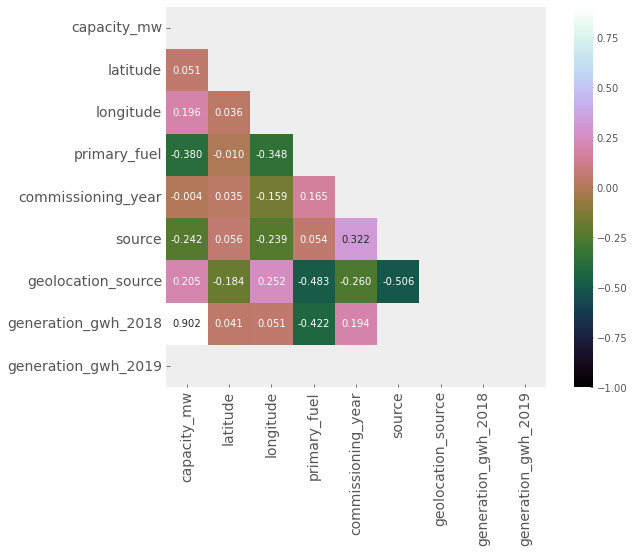

In [46]:
upper_triangle=np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, annot=True, square=True, fmt='0.3f',
           annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# correlation Bar Plot comparing features with our labels

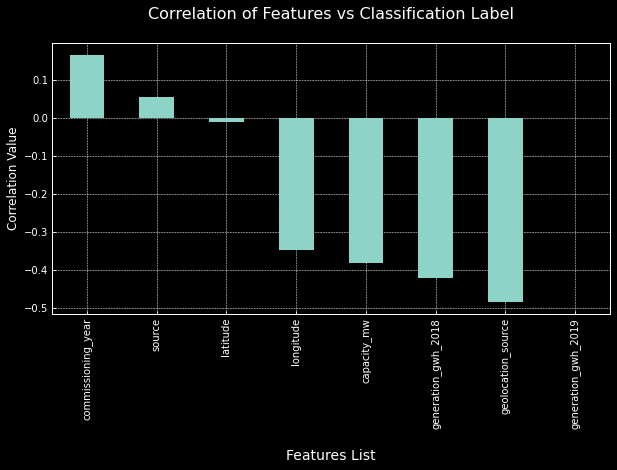

In [47]:
plt.style.use('dark_background')
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

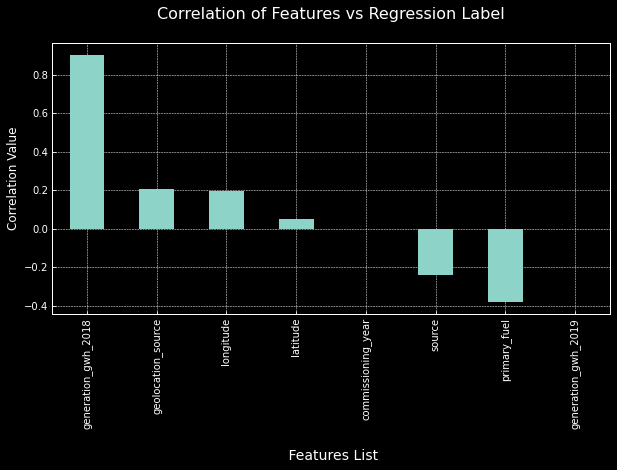

In [48]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\n Features List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

#Splitting the datset into 2 variables namely 'X' and'Y' for feature and classification label

In [49]:
X=df.drop('generation_gwh_2019', axis=1)
X=X.dropna()
Y=X['primary_fuel']
X=X.drop('primary_fuel',axis=1)
X.head(100)

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018
3,135.000,23.871200,91.360200,2004.0,22.0,2.0,626.239128
4,1800.000,21.960300,82.409100,2015.0,22.0,2.0,7279.000000
5,250.000,23.768900,68.644700,2005.0,22.0,2.0,976.655000
6,60.000,10.454700,77.007800,1970.0,22.0,2.0,48.327150
7,192.000,32.225800,77.207000,2010.0,22.0,2.0,579.318850
8,290.000,16.330000,75.886300,2004.0,22.0,2.0,406.377900
9,210.000,23.164200,81.637300,2008.0,22.0,2.0,1487.880000
10,1350.000,21.078200,77.900900,2014.0,22.0,2.0,3717.154000
11,134.000,31.271700,76.493800,1985.0,22.0,2.0,425.641100
12,1200.000,24.200700,82.800000,2011.0,22.0,2.0,7873.973000


# Resolving the class imbalance issue in our label column

In [50]:
Y.value_counts()

1    188
3    183
2     58
5     11
4      8
Name: primary_fuel, dtype: int64

In [51]:
oversample=SMOTE()
X,Y=oversample.fit_resample(X,Y)

In [52]:
Y.value_counts()

2    188
1    188
3    188
5    188
4    188
Name: primary_fuel, dtype: int64

# Feature Scaling

In [53]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2018
0,-0.654279,0.630024,2.807951,0.479156,0.0,0.0,-0.440244
1,2.086412,0.319987,0.871768,1.293352,0.0,0.0,1.431445
2,-0.464982,0.613426,-2.105563,0.553174,0.0,0.0,-0.341658
3,-0.777734,-1.546762,-0.296569,-2.037450,0.0,0.0,-0.602833
4,-0.560454,1.985533,-0.253481,0.923263,0.0,0.0,-0.453444


# Finding the best random state for building Regression Models

In [54]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred=lr.predict(X_test)
    r2=r2_score(Y_test,pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 score is", maxAccu, "on Random State", maxRS)        

Best R2 score is 0.4235907574826405 on Random State 515


# Regression Model Function

In [56]:
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25, random_state=135)
    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    rmse=mean_squared_error(Y_test,pred,squared=False)
    print("RMSE Score is:", rmse)
    r2=r2_score(Y_test,pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result=r2-cv_score
    print("R2 Score - Cross Validation Score is", result)

# Linear Regression Model

In [57]:
model=LinearRegression()
reg(model,X,Y)

RMSE Score is: 1.1702739561789093
R2 Score is: 30.180280779406722
Cross Validation Score: -1745.1287721355036
R2 Score - Cross Validation Score is 1775.3090529149104


# Ridge Regression

In [58]:
model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 1.1697760867292248
R2 Score is: 30.23967492519022
Cross Validation Score: -1754.6223922762958
R2 Score - Cross Validation Score is 1784.862067201486


# Vector Regression

In [59]:
model=SVR(C=1.0,epsilon=0.2,kernel='poly', gamma='auto')
reg(model,X,Y)

RMSE Score is: 1.545805480439356
R2 Score is: -21.818347271988525
Cross Validation Score: -2456.9696845539793
R2 Score - Cross Validation Score is 2435.151337281991


# Random Forest Regressor

In [60]:
model= RandomForestRegressor(max_depth=2,max_features="sqrt")
reg(model,X,Y)

RMSE Score is: 0.9941419920041236
R2 Score is: 49.61516336596403
Cross Validation Score: -1753.324588739296
R2 Score - Cross Validation Score is 1802.93975210526


# Gradient Boosting Regressor

In [62]:
model=GradientBoostingRegressor(loss='quantile', n_estimators=200,max_depth=5)
reg(model,X,Y)

RMSE Score is: 2.452094198322489
R2 Score is: -206.53305762236212
Cross Validation Score: -1201.84901442145
R2 Score - Cross Validation Score is 995.3159567990879


# Ada Boost Regressor

In [63]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X,Y)

RMSE Score is: 1.0168286300654021
R2 Score is: 47.289328448576796
Cross Validation Score: -952.82666647762
R2 Score - Cross Validation Score is 1000.1159949261969


# Extra Trees Regressor 

In [64]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt',n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.5519579270120952
R2 Score is: 84.46844397928474
Cross Validation Score: -638.0521839366932
R2 Score - Cross Validation Score is 722.5206279159779


# Hyper Parameter tuning on the best Regression ML Model

In [65]:
fmod_param={'criterion':['mse','mae'],
           'n_estimators':[100,200],
           'min_samples_split':[2,3],
           'random_state':[42,135],
           'n_jobs':[-1,1]
           }

After comparing all the regression models, i have selected Extra Trees Regressor as my best regression model and have listed down its parameters above referring the sklearn webpage.

In [66]:
GSCV= GridSearchCV(ExtraTreesRegressor(),fmod_param,cv=5)

In [68]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200], 'n_jobs': [-1, 1],
                         'random_state': [42, 135]})

In [69]:
GSCV.best_params_

{'criterion': 'mse',
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 135}

GridSearchCV has provided me with the best parameters list out of all combinations to train the model

In [71]:
Final_Model= ExtraTreesRegressor(criterion='mse', min_samples_split=3, n_estimators=100, n_jobs=-1, random_state=42)
Classifier= Final_Model.fit(X_train, Y_train)
fmod_pred=Final_Model.predict(X_test)
fmod_r2=r2_score(Y_test, fmod_pred)*100
print("R2 score for the best model is:", fmod_r2)

R2 score for the best model is: 83.96272569167861


# Saving the best Regression ML Model

In [72]:
filename="FinalModel_Regression_E04.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_Regression_E04.pkl']